![Texto alternativo](../tarea-Simulacion/imagen1.png)


# Paso 1, Importamos Librerias

In [1]:
import numpy as np
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt


# Paso 2, Ponemos los parametros

![Texto alternativo](../tarea-Simulacion/imagen2.png)


In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la malla y del problema
Lx, Ly = 1.0, 1.0
Nx, Ny = 50, 50           # número de nodos en x e y
dx, dy = Lx/(Nx-1), Ly/(Ny-1)
alpha  = 0.01
dt     = 0.15          # paso de tiempo
Nt     = 200            # nº de pasos de tiempo

# Coeficientes adimensionales
rx = alpha * dt*dt / dx**2
ry = alpha * dt*dt / dy**2

# Mapeo (i,j) -> p en el vector de incógnitas
def idx(i, j):
    return i * Ny + j

# Construcción de la matriz A (N×N)
N = Nx * Ny
A = np.zeros((N, N))
for i in range(Nx):
    for j in range(Ny):
        p = idx(i, j)
        if j == 0:
            # Dirichlet en y=0
            A[p, p] = 1
        elif j == Ny-1:
            # Dirichlet en y=1
            A[p, p] = 1
        else:
            # Interior
            A[p, p] = 1 + 2*(rx + ry)
            # vecinos en x
            if i == 0:
                # Neumann x=0 (reflejo)
                A[p, idx(i+1, j)] = -2*rx
            elif i == Nx-1:
                # Neumann x=1
                A[p, idx(i-1, j)] = -2*rx
            else:
                # interior
                A[p, idx(i-1, j)] = -rx
                A[p, idx(i+1, j)] = -rx
            # vecinos en y
            # abajo
            if j > 1:
                A[p, idx(i, j-1)] = -ry
            # arriba
            if j < Ny-2:
                A[p, idx(i, j+1)] = -ry

# Condición inicial
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')
T = 100 * np.sin(np.pi * X) * np.sin(np.pi * Y)
T[:, 0] = -20
T[:, -1] = 120

T_vec = T.ravel()

# Bucle de tiempo implícito completo
for _ in range(Nt):
    b = np.zeros(N)
    for i in range(Nx):
        for j in range(Ny):
            p = idx(i, j)
            if j == 0:
                # Dirichlet inferior
                b[p] = -20
            elif j == Ny-1:
                # Dirichlet superior
                b[p] = 120
            else:
                # interior
                b[p] = T_vec[p]
                # contribución Dirichlet inferior
                if j == 1:
                    b[p] += ry * T[i, j-1]
                # contribución Dirichlet superior
                if j == Ny-2:
                    b[p] += ry * T[i, j+1]
    # resolvemos
    T_vec = np.linalg.solve(A, b)
    T = T_vec.reshape((Nx, Ny))

# Gráfica
plt.figure(figsize=(5,4))
plt.contourf(X, Y, T, levels=50)
plt.colorbar(label='Temperatura')
plt.xlabel('y')
plt.ylabel('x')
plt.title('Distribución de temperatura final (implícito corregido)')
plt.show()


KeyboardInterrupt: 

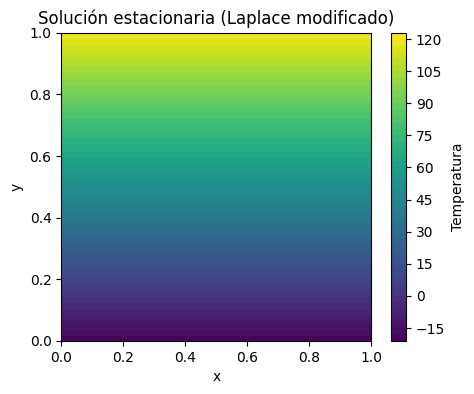

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la malla y del problema (estacionario)
Lx, Ly = 1.0, 1.0
Nx, Ny = 50, 50           # número de nodos en x e y
dx, dy = Lx/(Nx-1), Ly/(Ny-1)

# Mapeo (i,j) -> p en el vector de incógnitas
def idx(i, j):
    return i * Ny + j

# Construcción de la matriz A (N×N) y el vector b
N = Nx * Ny
A = np.zeros((N, N))
b = np.zeros(N)

for i in range(Nx):
    for j in range(Ny):
        p = idx(i, j)
        # Condiciones de Dirichlet en y=0 y y=1
        if j == 0:
            A[p, p] = 1
            b[p] = -20
        elif j == Ny - 1:
            A[p, p] = 1
            b[p] = 120
        else:
            # Interior en y, puede ser Neumann en x=0 o x=1
            # Coeficientes del stencil 5 puntos
            # ∂²T/∂x² aproximado con Neumann: ghost -> reflejo
            if i == 0:
                A[p, p] += -2.0 / dx**2
                A[p, idx(i + 1, j)] = 2.0 / dx**2
            elif i == Nx - 1:
                A[p, p] += -2.0 / dx**2
                A[p, idx(i - 1, j)] = 2.0 / dx**2
            else:
                A[p, p] += -2.0 / dx**2
                A[p, idx(i - 1, j)] = 1.0 / dx**2
                A[p, idx(i + 1, j)] = 1.0 / dx**2
            
            # ∂²T/∂y² interior
            A[p, p] += -2.0 / dy**2
            A[p, idx(i, j - 1)] = 1.0 / dy**2
            A[p, idx(i, j + 1)] = 1.0 / dy**2

# Resolución del sistema lineal
T_vec = np.linalg.solve(A, b)
T_stat = T_vec.reshape((Nx, Ny))

# Coordenadas para graficar
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Gráfica de la solución estacionaria
plt.figure(figsize=(5, 4))
plt.contourf(X, Y, T_stat, levels=50)
plt.colorbar(label='Temperatura')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución estacionaria (Laplace modificado)')
plt.show()


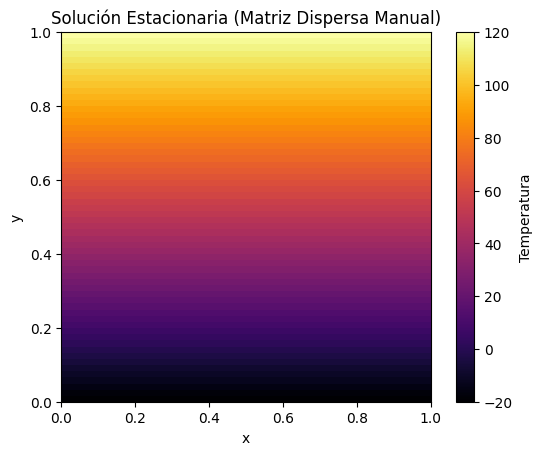

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
L = 1.0
Nx = 60
Ny = 60
dx = L / (Nx - 1)
dy = L / (Ny - 1)
c2 = 0.01

# Mallado
x = np.linspace(0, L, Nx)
y = np.linspace(0, L, Ny)
X, Y = np.meshgrid(x, y)

def index(i, j):
    return i * Nx + j

# Estructura dispersa: lista de tuplas (fila, columna, valor)
row_idx = []
col_idx = []
data = []
b = np.zeros(Nx * Ny)

for i in range(Ny):
    for j in range(Nx):
        idx = index(i, j)

        # Condición de frontera T(x,0) = -20
        if i == 0:
            row_idx.append(idx)
            col_idx.append(idx)
            data.append(1.0)
            b[idx] = -20.0

        # Condición de frontera T(x,1) = 120
        elif i == Ny - 1:
            row_idx.append(idx)
            col_idx.append(idx)
            data.append(1.0)
            b[idx] = 120.0

        # Neumann dT/dx = 0 en x=0
        elif j == 0:
            row_idx.extend([idx, idx])
            col_idx.extend([idx, index(i, j + 1)])
            data.extend([1.0, -1.0])
            b[idx] = 0.0

        # Neumann dT/dx = 0 en x=1
        elif j == Nx - 1:
            row_idx.extend([idx, idx])
            col_idx.extend([idx, index(i, j - 1)])
            data.extend([1.0, -1.0])
            b[idx] = 0.0

        # Punto interior
        else:
            row_idx.extend([idx]*5)
            col_idx.extend([
                index(i, j),      # centro
                index(i, j-1),    # izquierda
                index(i, j+1),    # derecha
                index(i-1, j),    # abajo
                index(i+1, j)     # arriba
            ])
            data.extend([
                -2*c2/dx**2 + 2*c2/dy**2,
                 c2/dx**2,
                 c2/dx**2,
                -c2/dy**2,
                -c2/dy**2
            ])

# Convertir a matriz dispersa manual
N = Nx * Ny
A = np.zeros((N, N))
for r, c, v in zip(row_idx, col_idx, data):
    A[r, c] += v  # suma en caso de elementos repetidos

# Resolver sistema
T_vec = np.linalg.solve(A, b)
T_mat = T_vec.reshape(Ny, Nx)

# Visualizar
plt.imshow(T_mat, cmap='inferno', origin='lower', extent=[0, L, 0, L])
plt.colorbar(label='Temperatura')
plt.title("Solución Estacionaria (Matriz Dispersa Manual)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
